<a href="https://colab.research.google.com/github/the-sulav/online-retail/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source:https://www.kaggle.com/datasets/thedevastator/online-retail-transaction-data

In [ ]:
print("Please download the dataset from Kaggle: https://www.kaggle.com/datasets/thedevastator/online-retail-transaction-data")

In [ ]:
# Import required libraries
import pandas as pd


In [ ]:
# Read the dataset into a DataFrame

data = pd.read_csv("online_retail.csv")

In [ ]:
# Display the shape of the dataset
print(f"Shape:{data.shape}")

# Display the last few rows of the dataset
print("Last Few Rows of the Dataset:")
print(data.tail()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
# Create a copy of the dataset for further processing (Checkpoint 1)
dfa = data.copy()

Analyzing and Cleaning the Dataset


In [ ]:
# Checking for One-to-One Mapping between StockCode and Description

no_of_duplicate_rows = dfa.duplicated().sum()
print("No of duplicate rows : ", no_of_duplicate_rows)

No of duplicate rows :  0


checking if there is X-->Y(one to one) maping between StockCode and Description

In [ ]:
# Iterate through each row in the DataFrame to create the mapping

my_dict = {}
i=0
for stock_code in dfa["StockCode"]:
  if (stock_code not in my_dict):
    my_dict[stock_code] = [dfa["Description"].iloc[i]]
  else:
    temp_list = my_dict[stock_code]
    if len(temp_list) >1:
      if dfa["Description"].iloc[i] not in temp_list:
        temp_list.append(dfa["Description"].iloc[i])
        my_dict[stock_code] = temp_list
    else:
      if temp_list[0]!=dfa["Description"].iloc[i]:
        temp_list.append(dfa["Description"].iloc[i])
        my_dict[stock_code] = temp_list
  i+=1

In [ ]:
# Display the total number of unique StockCodes
print(f'there are {len(my_dict.keys())} unique entres in StoreCode')

there are 4070 unique entres in StoreCode


In [ ]:
# Print StockCodes with multiple associated Descriptions

 a=0
for keys in my_dict.keys():
  if len(my_dict[keys])>1:
    print(f"Key: {keys}, Value: {my_dict[keys]}")
    a+=1

Key: 85123A, Value: ['WHITE HANGING HEART T-LIGHT HOLDER', '?', 'wrongly marked carton 22804', 'CREAM HANGING HEART T-LIGHT HOLDER']
Key: 71053, Value: ['WHITE METAL LANTERN', 'WHITE MOROCCAN METAL LANTERN']
Key: 84406B, Value: ['CREAM CUPID HEARTS COAT HANGER', 'incorrectly made-thrown away.', '?', nan]
Key: 84029G, Value: ['KNITTED UNION FLAG HOT WATER BOTTLE', nan]
Key: 84029E, Value: ['RED WOOLLY HOTTIE WHITE HEART.', nan]
Key: 22633, Value: ['HAND WARMER UNION JACK', nan]
Key: 22632, Value: ['HAND WARMER RED POLKA DOT', 'HAND WARMER RED RETROSPOT', nan]
Key: 84879, Value: ['ASSORTED COLOUR BIRD ORNAMENT', 'damaged']
Key: 84969, Value: ['BOX OF 6 ASSORTED COLOUR TEASPOONS', 'check']
Key: 21777, Value: ['RECIPE BOX WITH METAL HEART', nan]
Key: 22726, Value: ['ALARM CLOCK BAKELIKE GREEN', nan]
Key: 10002, Value: ['INFLATABLE POLITICAL GLOBE ', nan]
Key: 22900, Value: [' SET 2 TEA TOWELS I LOVE LONDON ', 'SET 2 TEA TOWELS I LOVE LONDON ']
Key: POST, Value: ['POSTAGE', nan]
Key: 37370,

In [1]:

# Display missing values in each column after removing Description
for feature in dfa.columns:
    missing_values = dfa[feature].isnull().sum()
    print(f'No of missing values in column {feature} is: {missing_values}')




NameError: name 'dfa' is not defined

In [ ]:
print(f'There are {a}: no of StockCode that have more than one value for Description')

There are 1324: no of StockCode that have more than one value for Description


Handling for missing values in Description

All of the StockCode with more than one value for Description are caused due to mislabeling or the values are missing. It is impossible to correct all the mislabled Discription . So it is safe to assume that there is direct X-->Y (one to one) maping between StoreCode and Description.  

so the Description feature Column can be removed as it doesn't affect the dataset while analyzing data.

In [ ]:
# Removing the Description feature column

if "Description" in dfa.columns:
  Description_column = dfa.pop("Description")
  print("Description column removed fro dataset and stored to Description_column")
else:
  print("Description column already removed")

Description column removed fro dataset and stored to Description_column


In [ ]:
# Display missing values in each column after removing Description
for feature in dfa.columns:
  missing_values = dfa[feature].isnull().sum()
  print(f'No of missing values in column {feature} is: {missing_values}')


No of missing values in column index is: 0
No of missing values in column InvoiceNo is: 0
No of missing values in column StockCode is: 0
No of missing values in column Description is: 1454
No of missing values in column Quantity is: 0
No of missing values in column InvoiceDate is: 0
No of missing values in column UnitPrice is: 0
No of missing values in column CustomerID is: 135080
No of missing values in column Country is: 0


Handling for missing values in CustomerID

In [ ]:
# Check the existence of ID 9999 in the CustomerID column
Random_ID = "9999" in str(dfa["CustomerID"].sum())
print(f'The existence of ID {9999} in the feature column CustomerID is {Random_ID}')

# Fill missing values in CustomerID with "9999" to represent unlabeled customers
dfa["CustomerID"].fillna("9999", inplace=True)
print("Now CustomerID: 9999 refers to the unlabeled customer in the dataset.\n")


In [ ]:
#Checking for missing values
for feature in dfa.columns:
  missing_values = dfa[feature].isnull().sum()
  print(f'No of missing values in column {feature} is: {missing_values}')


No of missing values in column index is: 0
No of missing values in column InvoiceNo is: 0
No of missing values in column StockCode is: 0
No of missing values in column Quantity is: 0
No of missing values in column InvoiceDate is: 0
No of missing values in column UnitPrice is: 0
No of missing values in column CustomerID is: 0
No of missing values in column Country is: 0


In [ ]:
#also removind Index as it is just Index
if "index" in dfa.columns:
  dfa.pop("index")


In [ ]:
dfa.columns


Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Feature Engineering: Create a new column Total_sale_price

dfa["Total_sale_price"] = dfa["Quantity"]*dfa["UnitPrice"]

#Data Visualization

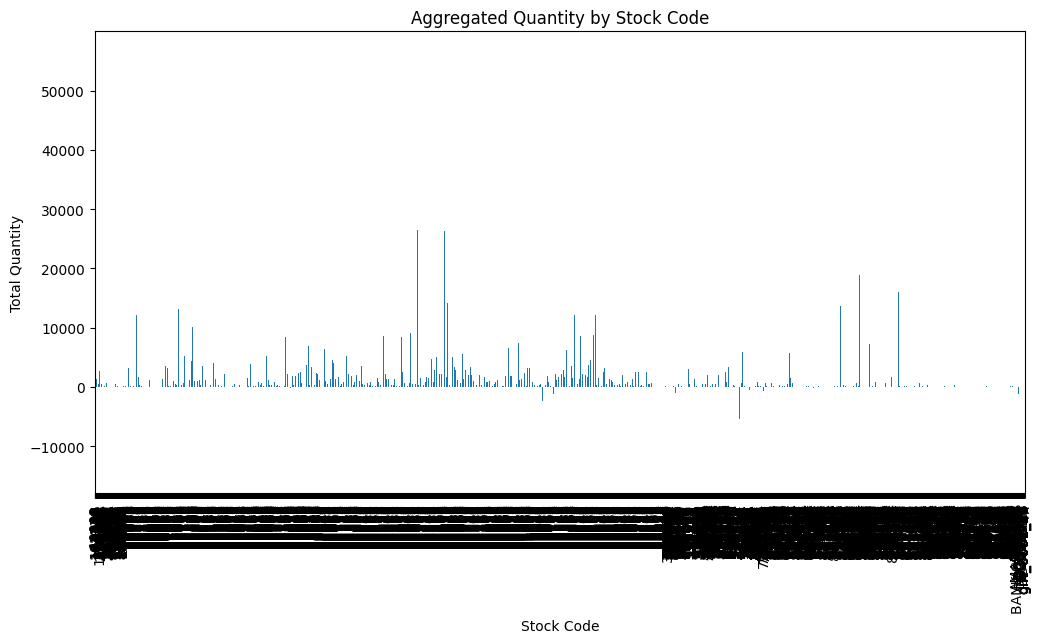

In [ ]:
# Group by StockCode and aggregate Quantity
aggregated_data = dfa.groupby('StockCode')['Quantity'].sum()

# Create a bar chart for aggregated Quantity by Stock Code
aggregated_data.plot(kind='bar', figsize=(12, 6))
plt.title('Aggregated Quantity by Stock Code')
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity')
plt.show()

In [ ]:
print(dfa["InvoiceDate"][0])
# since we have date and time stored in the same feature column so lets seperate the two

12/1/2010 8:26


In [ ]:
dfb = dfa.copy() #Checkpoint 2

In [ ]:
# Separate Date and Time from InvoiceDate

dfb["InvoiceDate"] = pd.to_datetime(dfb["InvoiceDate"], format="%m/%d/%Y %H:%M")
dfb["Date"] = dfb["InvoiceDate"].dt.date
dfb["Time"] = dfb["InvoiceDate"].dt.strftime('%H/%M')
dfb["Date"] = pd.to_datetime(dfb["Date"])
dfb["Time"] = pd.to_datetime(dfb["Time"], format='%H/%M').dt.time

# Remove the original InvoiceDate column
if "InvoiceDate" in dfb.columns:
  dfb.pop("InvoiceDate")


In [ ]:
# Create a copy for further exploration
df_temp = dfb.copy()

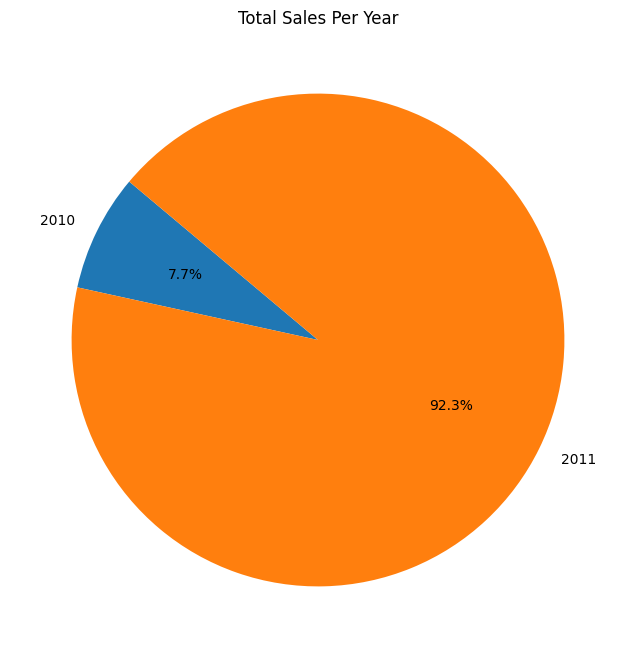

In [ ]:
# For total sales per year
df_temp["Year"] = df_temp["Date"].dt.year
sales_per_year = df_temp.groupby('Year')['Total_sale_price'].sum()


# Plot a pie chart for total sales per year
plt.figure(figsize=(8, 8))
plt.pie(sales_per_year, labels=sales_per_year.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Per Year')
plt.show()

In [ ]:
# For total sales per month across all time
df_temp['month'] = df_temp['Date'].dt.month_name()

In [ ]:
# Define the order of months for better visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']





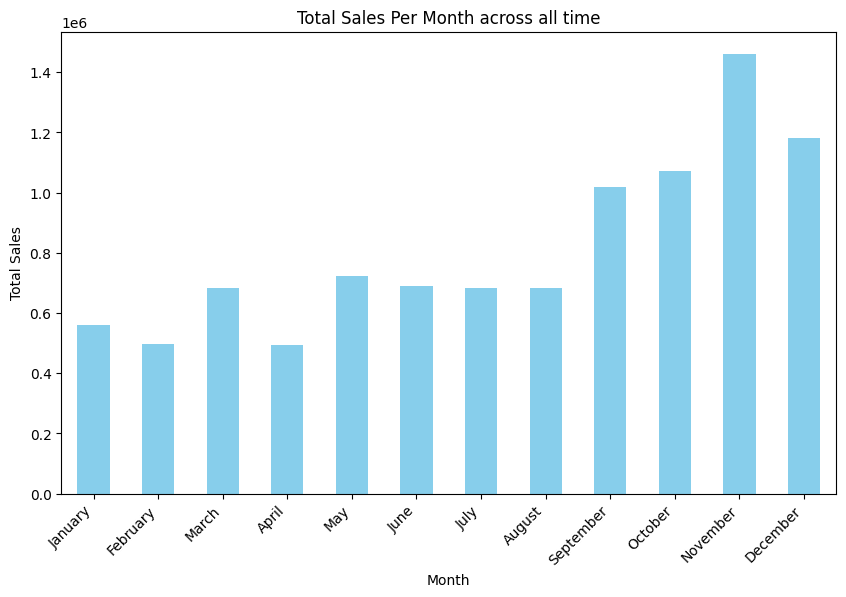

In [ ]:
# Group by month and plot total sales per month
sales_per_month = df_temp.groupby('month')['Total_sale_price'].sum().reindex(month_order)

plt.figure(figsize=(10, 6))
sales_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Month across all time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

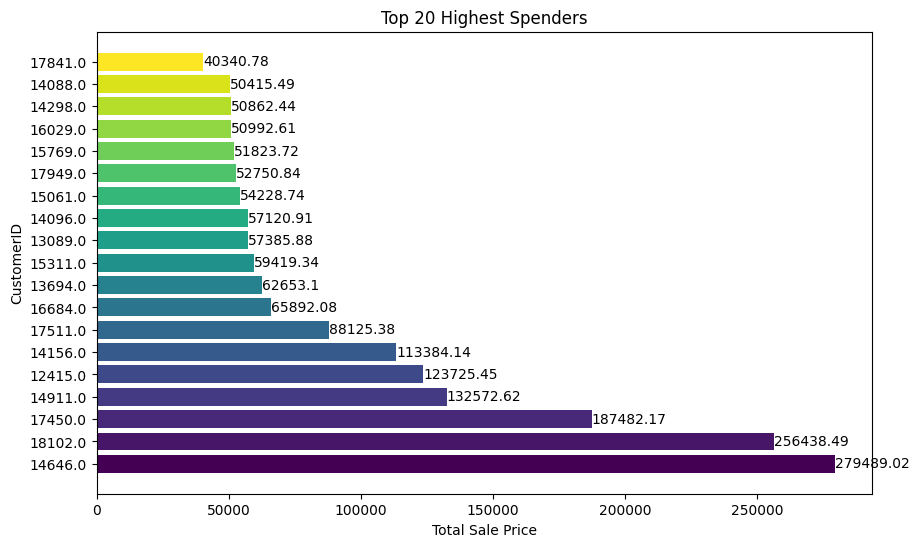

In [ ]:
# Top 20 Highest Spenders (excluding unlabeled customer 9999)

customer_totals = dfb.groupby('CustomerID')['Total_sale_price'].sum()

# Select the top 20 highest spenders
top_20 = customer_totals.nlargest(20)

# Find the customer with the highest value
highest_value_customer = top_20.idxmax()

# Exclude the customer with the highest value from the top 20 because Customer 9999 are unlabled customers
top_20_excluded_highest = top_20[top_20.index != highest_value_customer]

# Plot the horizontal bar graph for the top 20 highest spenders
plot_data = pd.DataFrame({
    'CustomerID': top_20_excluded_highest.index.astype(str).tolist(),
    'Total Sale Price': top_20_excluded_highest.tolist()
})

# Generate distinct colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(plot_data)))

# Plot the horizontal bar graph with distinct colors
plt.figure(figsize=(10, 6))
bars = plt.barh(plot_data['CustomerID'], plot_data['Total Sale Price'], color=colors)

# Add values on the bars
for bar, value in zip(bars, plot_data['Total Sale Price']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(value, 2), ha='left', va='center')

plt.xlabel('Total Sale Price')
plt.ylabel('CustomerID')
plt.title('Top 20 Highest Spenders')
plt.show()

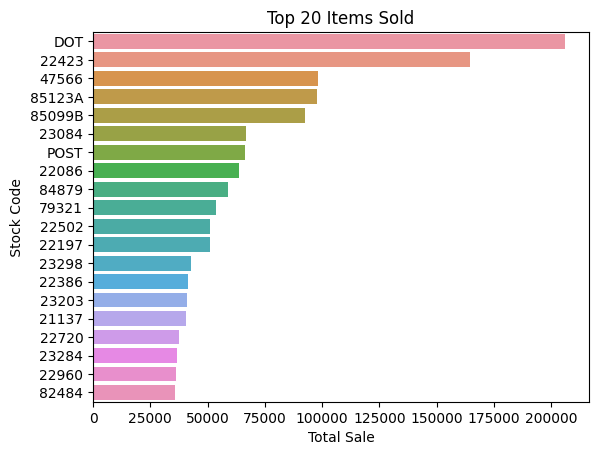

In [ ]:
# Top n Items Sold
n=20
top_n_sales = dfb.groupby("StockCode")["Total_sale_price"].sum().nlargest(n)

plt.figure(dpi = 100)
sns.barplot(x = top_n_sales.values, y = top_n_sales.index)
plt.ylabel(" Stock Code ")
plt.xlabel("Total Sale")
plt.title(f"Top {n} Items Sold");